# Random Forest Pipeline

In [2]:
#importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
#loading train dataset
df_full = pd.read_csv(r"titanic_2.csv")
print(df_full.shape)
#df_full.head()

(712, 20)


In [3]:
#breaking down into X and y arrays, removing categorical vars: train
X = df_full.drop(['Survived','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
y = pd.DataFrame(df_full['Survived'])
print(X.shape)
print(y.shape)
#X.head()

(712, 14)
(712, 1)


In [4]:
#train, dev split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1)

In [5]:
#random forest - main
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

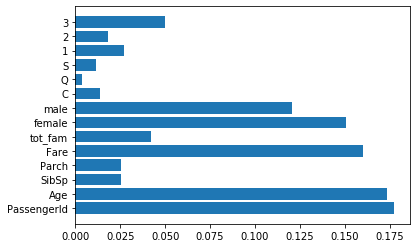

In [6]:
#feature importance
pyplot.barh(X_train.columns, clf.feature_importances_)
pyplot.show()

In [7]:
#prediction y for dev data 
y_pred_dev=clf.predict(X_dev)

In [8]:
y_dev = y_dev['Survived'].to_numpy()
y_dev

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0], dtype=int64)

In [9]:
confusion_matrix = (metrics.confusion_matrix(y_dev, y_pred_dev, labels=[0,1]))
print(confusion_matrix)

[[35  7]
 [11 19]]


In [10]:
#calculating accuracy and other scores
accuracy_dev = metrics.accuracy_score(y_dev, y_pred_dev)
print('accuracy is: '+ str(accuracy_dev))
precision_dev = metrics.precision_score(y_dev, y_pred_dev)
print(precision_dev)
sensitivity_dev = metrics.recall_score(y_dev, y_pred_dev)
print(sensitivity_dev)
f1_score_dev = metrics.f1_score(y_dev, y_pred_dev)
print(f1_score_dev)

accuracy is: 0.75
0.7307692307692307
0.6333333333333333
0.6785714285714285


## Test pipeline-predicts and creates submission csv

In [12]:
#loading test dataset
df_full_test = pd.read_csv(r"test.csv")
print(df_full_test.shape)
#df_full_test.head()

(418, 11)


In [13]:
#making the test data in the same format as X_train
X_test = df_full_test.drop(['Cabin'], axis = 1)
X_test['tot_fam'] = X_test['SibSp'] + X_test['Parch']
#X_test.head()

In [14]:
dummy_sex = pd.get_dummies(X_test['Sex'])
X_test = pd.concat([X_test, dummy_sex], axis=1)

In [15]:
dummy_embark = pd.get_dummies(X_test['Embarked'])
X_test = pd.concat([X_test, dummy_embark], axis=1)
#X_test.head()

In [16]:
dummy_pclass = pd.get_dummies(X_test['Pclass'])
X_test = pd.concat([X_test, dummy_pclass], axis=1)
#X_test.head()

In [17]:
X_test = X_test.drop(['Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
print(X_test.shape)
#X_test.head()

(418, 14)


In [18]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', '1', '2', '3'],
      dtype='object')
Index(['PassengerId',         'Age',       'SibSp',       'Parch',
              'Fare',     'tot_fam',      'female',        'male',
                 'C',           'Q',           'S',             1,
                   2,             3],
      dtype='object')


In [243]:
X_test.PassengerId.isnull().value_counts()

False    418
Name: PassengerId, dtype: int64

In [19]:
#calculates fill rate for columns
fill_rate = {}
for i in X_test:
    null_count = (X_test[i].isna().sum())
    frate = 100-(null_count/len(X_test))*100
    fill_rate[i]=frate

#converts fill rate from dictionary to a dataframe
fillrate_df = pd.DataFrame((fill_rate.items()), columns = ['column_name', 'fill_rate'])
fillrate_df

,column_name,fill_rate
0,PassengerId,100.000000
1,Age,79.425837
2,SibSp,100.000000
3,Parch,100.000000
4,Fare,99.760766
5,tot_fam,100.000000
6,female,100.000000
7,male,100.000000
8,C,100.000000
9,Q,100.000000


In [20]:
#prediction y for dev data 
y_pred_test=clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [21]:
y_pred_test_df.shape

NameError: name 'y_pred_test_df' is not defined

In [22]:
y_pred_test_df.head()
X_test.head()

NameError: name 'y_pred_test_df' is not defined

In [23]:
X_concat = X_test[['PassengerId']]
X_concat.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [24]:
#creating final submission csv
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df.rename(columns = {0:'Survived'},inplace = True)
csv_submission = pd.merge(X_concat,y_pred_test_df, left_index=True, right_index=True)
csv_submission.head()

NameError: name 'y_pred_test' is not defined

In [25]:
csv_submission.PassengerId.isnull().value_counts()

NameError: name 'csv_submission' is not defined

In [26]:
csv_submission.to_csv('csv_submission.csv', index = False)

NameError: name 'csv_submission' is not defined

In [20]:
#automated iteration tracker- user inputs - write a description of this iteration, what was done differently
description = 'this is a test'

accuracy_dev = 343
accuracy_test = 534
precision_dev = 543
precision_test = 34
sensitivity_dev = 34 
sensitivity_test = 34
f1_score_dev = 34
f1_score_test = 34

In [25]:
#making a dataframe for automated tracker info, saving as csv
col_list = ['accuracy_dev'
,'accuracy_test'
,'precision_dev'
,'precision_test'
,'sensitivity_dev'
,'sensitivity_test'
,'f1_score_dev'
,'f1_score_test'
,'description']

model_tracker = pd.DataFrame(columns = col_list)

row = pd.DataFrame([[accuracy_dev
,accuracy_test
,precision_dev
,precision_test
,sensitivity_dev
,sensitivity_test
,f1_score_dev
,f1_score_test
,description]],columns = col_list)

model_tracker = model_tracker.append(row, ignore_index = True)
model_tracker.to_csv(r'model_tracker.csv', index = True)
model_tracker

,accuracy_dev,accuracy_test,precision_dev,precision_test,sensitivity_dev,sensitivity_test,f1_score_dev,f1_score_test,description
0,343,534,543,34,34,34,34,34,this is a test


In [28]:
#grid search for hyper parameter tuning
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined